In [5]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import DBSCAN
import umap
import hdbscan
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from read_clustering.variant_call import VariantCalls
threshold = 0.5
np.random.seed(42)

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
ivt_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/canonical_ivt_round30_alt_canonical_supervised_500_500.model.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_cbf5_gal_round30_alt_canonical_supervised_500_500.model.csv"
native_nop58_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_nop58_gal_round30_alt_canonical_supervised_500_500.model.csv"


In [7]:
file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, 
              native_cbf5_gal_path, native_nop58_gal_path]
labels = ["ivt_path", "cbf5_glu_psu_depletion_path", "nop58_glu_2o_depletion_path",
          "native_cbf5_gal_path", "native_nop58_gal_path"]


In [8]:
vc = VariantCalls(file_paths, labels)


In [9]:
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]

In [122]:
pseduo_u_df = vc.get_positions_of_variant_set(pseudou)
twoprimeo_df = vc.get_positions_of_variant_sets(twoprimeo)
contig = "RDN25-1"


In [123]:
# pseduo_u_df.to_csv("/Users/andrewbailey/CLionProjects/rrna_analysis/reference/misc_pos_files/pseudo_u.positions", index=False)

In [124]:
# twoprimeo_df.to_csv("/Users/andrewbailey/CLionProjects/rrna_analysis/reference/misc_pos_files/twoprime.positions", index=False)

In [125]:
pseduo_u_pos = pseduo_u_df[pseduo_u_df["contig"] == contig]["reference_index"].values
twoprimeo_pos = twoprimeo_df[twoprimeo_df["contig"] == contig]["reference_index"].values
positions = vc.get_contig_positions(contig)
data = vc.data[(vc.data["contig"] == contig) & (vc.data['reference_index'].isin(positions))]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
nop58_glu = X.loc[(slice(None), 'nop58_glu_2o_depletion_path'), :]
cbf5_glu = X.loc[(slice(None), 'cbf5_glu_psu_depletion_path'), :]
native = X.loc[(slice(None), 'native_cbf5_gal_path'), :]
ivt = X.loc[(slice(None), 'ivt_path'), :]


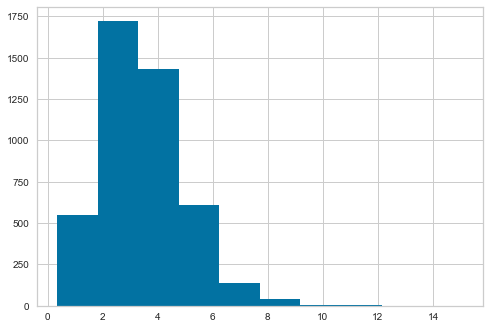

In [126]:
ivt[pseduo_u_pos].sum(axis=1).hist()

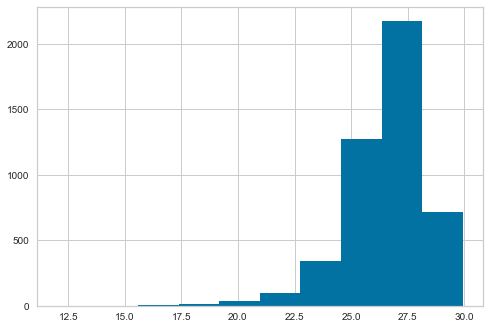

In [127]:
native[pseduo_u_pos].sum(axis=1).hist()

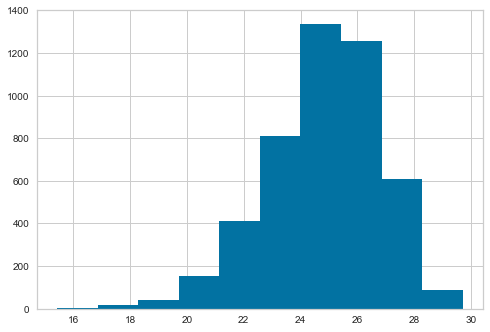

In [128]:
nop58_glu[pseduo_u_pos].sum(axis=1).hist()

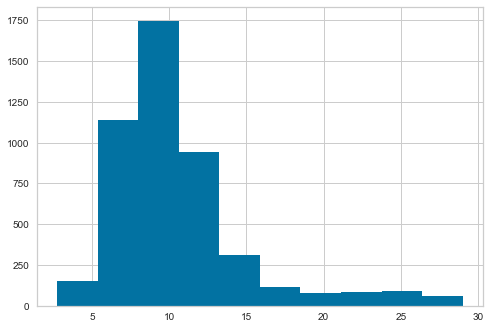

In [129]:
# X.loc[["native_nop58_gal_path"]]
# "nop58_glu_2o_depletion_path"
cbf5_glu[pseduo_u_pos].sum(axis=1).hist()

In [130]:
if contig == "RDN25-1":
    threshold = 17
    threshold2 = 23
else:
    threshold = 7
    threshold2 = 8

threshold = ivt[pseduo_u_pos].sum(axis=1).sort_values()[int(len(ivt) * 0.99)]
threshold2 = native[pseduo_u_pos].sum(axis=1).sort_values()[int(len(native) * 0.05)]
print(threshold, threshold2)

total_pseudoU_prob = cbf5_glu[pseduo_u_pos].sum(axis=1)
high_confidence_depletions = total_pseudoU_prob[total_pseudoU_prob < threshold]
high_confidence_all_mod = total_pseudoU_prob[total_pseudoU_prob > threshold2]

read_ids = high_confidence_depletions.index.get_level_values(0)
print(len(high_confidence_depletions))
print(len(total_pseudoU_prob))
print(len(high_confidence_depletions) / len(total_pseudoU_prob))
print(len(high_confidence_all_mod) / len(total_pseudoU_prob))


7.790882699999999 23.41791996
1148
4715
0.24347826086956523
0.033722163308589605


In [131]:
# out_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/reference/depletion_read_ids/{contig}_cbf5_glu.txt"
# pd.DataFrame(read_ids).to_csv(out_path, header=False, index=False)      

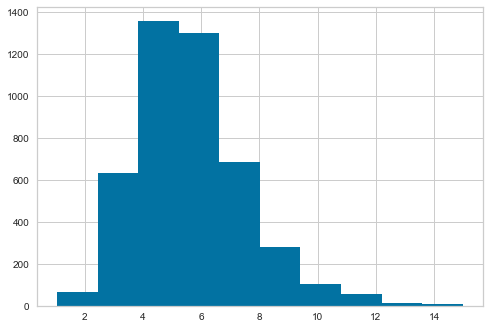

In [132]:
ivt[twoprimeo_pos].sum(axis=1).hist()

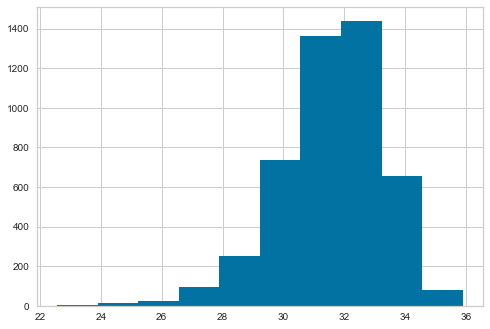

In [133]:
native[twoprimeo_pos].sum(axis=1).hist()

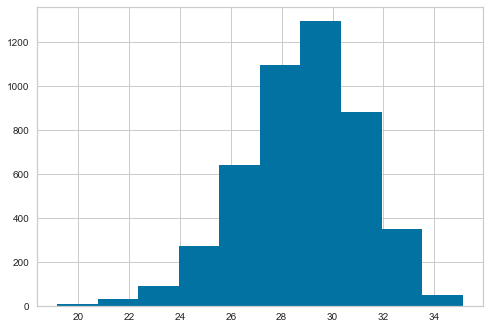

In [134]:
cbf5_glu[twoprimeo_pos].sum(axis=1).hist()

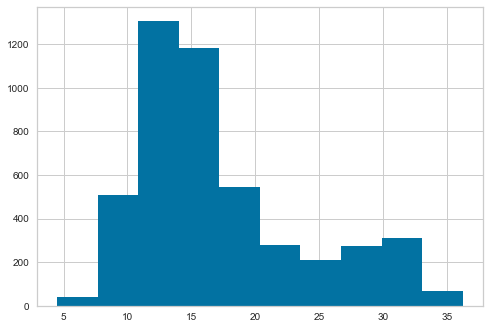

In [135]:
nop58_glu[twoprimeo_pos].sum(axis=1).hist()

In [142]:

if contig == "RDN25-1":
    threshold = 21
    threshold2 = 28
else:
    threshold = 10
    threshold2 = 13

threshold = ivt[twoprimeo_pos].sum(axis=1).sort_values()[int(len(ivt) * 0.9999)]
threshold2 = native[twoprimeo_pos].sum(axis=1).sort_values()[int(len(native) * 0.05)]
print(threshold, threshold2)
    
total_twoprimeo_prob = nop58_glu[twoprimeo_pos].sum(axis=1)
high_confidence_depletions = total_twoprimeo_prob[total_twoprimeo_prob < threshold]
high_confidence_all_mod = total_twoprimeo_prob[total_twoprimeo_prob > threshold2]

read_ids = high_confidence_depletions.index.get_level_values(0)
print(len(high_confidence_depletions))
print(len(total_twoprimeo_prob))
print(len(high_confidence_depletions) / len(total_twoprimeo_prob))
print(len(high_confidence_all_mod) / len(total_twoprimeo_prob))


14.988703399999999 28.523839000000002
2310
4723
0.4890959136142282
0.10819394452678383


In [107]:
out_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/reference/depletion_read_ids/{contig}_nop58_glu.txt"
pd.DataFrame(read_ids).to_csv(out_path, header=False, index=False)      